

---



---



# **Fake review Detection**



**Models used:**


> Linear Regression

> Gradient Boosting Models (XGBoost)


> Support Vector Machines (SVM)


> Random Forest


**Dataset used:**


>deceptive-opinion.csv (https://www.kaggle.com/datasets/rtatman/deceptive-opinion-spam-corpus/data)












---



---


In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded=files.upload()

Saving deceptive-opinion.csv to deceptive-opinion.csv


In [5]:
df=pd.read_csv('deceptive-opinion.csv')



---



# **Data Pre-processing**

**Checking null values**

In [6]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [7]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


Text(0.5, 1.0, 'Count of Deceptive and Truthful Positive and Negative Reviews')

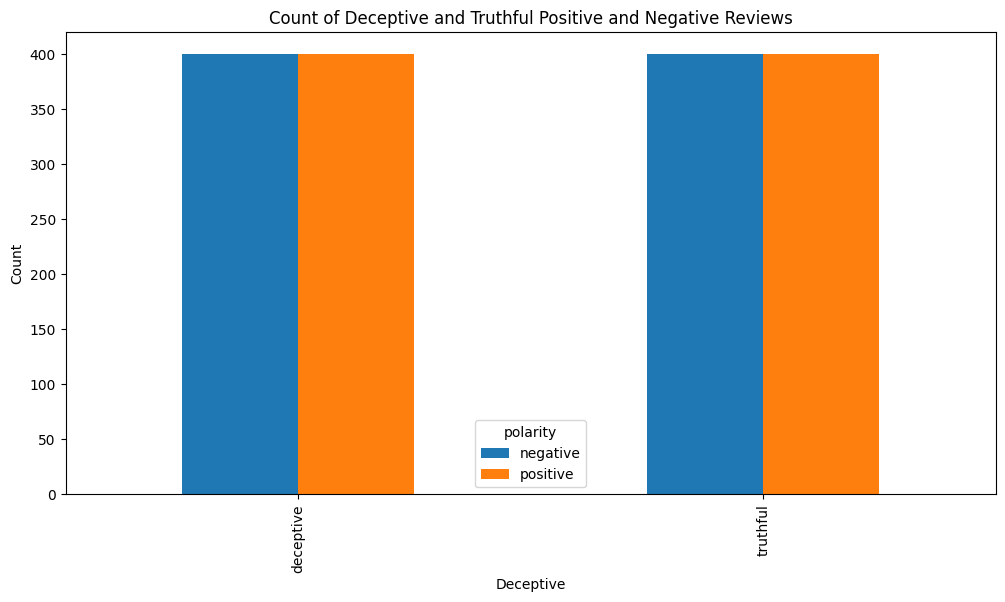

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby(['deceptive', 'polarity']).size().unstack().plot(ax=ax, kind='bar')
plt.xlabel('Deceptive')
plt.ylabel('Count')
plt.title('Count of Deceptive and Truthful Positive and Negative Reviews')



---



**Removing unnecesary columns**

In [11]:
df=df.drop(['hotel'],axis=1)
df=df.drop(['source'],axis=1)
df

,deceptive,polarity,text
0,truthful,positive,We stayed for a one night getaway with family ...
1,truthful,positive,Triple A rate with upgrade to view room was le...
2,truthful,positive,This comes a little late as I'm finally catchi...
3,truthful,positive,The Omni Chicago really delivers on all fronts...
4,truthful,positive,I asked for a high floor away from the elevato...
...,...,...,...
1595,deceptive,negative,Problems started when I booked the InterContin...
1596,deceptive,negative,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,"The Palmer House Hilton, while it looks good i..."




---



**Make text lowercase, remove text in square brackets, remove numbers, remove special characters and  remove links.**

In [12]:
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z]', ' ')
df['text'] = df['text'].str.replace('\\[.*?\\]', ' ')
df['text'] = df['text'].str.replace('http.*? ', ' ')
df['text'] = df['text'].str.replace('https.*? ', ' ')
df['text'] = df['text'].str.replace('www.*? ', ' ')
df['text'] = df['text'].str.replace('\\w*\\d+\\w*', ' ')
df

<ipython-input-12-ad89b9b800cb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z]', ' ')
<ipython-input-12-ad89b9b800cb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\\[.*?\\]', ' ')
<ipython-input-12-ad89b9b800cb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http.*? ', ' ')
<ipython-input-12-ad89b9b800cb>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('https.*? ', ' ')
<ipython-input-12-ad89b9b800cb>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('www.*? ', ' ')
<ipython-input-12-ad89b9b800cb>:6: FutureWarning: The default valu

,deceptive,polarity,text
0,truthful,positive,we stayed for a one night getaway with family ...
1,truthful,positive,triple a rate with upgrade to view room was le...
2,truthful,positive,this comes a little late as i m finally catchi...
3,truthful,positive,the omni chicago really delivers on all fronts...
4,truthful,positive,i asked for a high floor away from the elevato...
...,...,...,...
1595,deceptive,negative,problems started when i booked the intercontin...
1596,deceptive,negative,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,the palmer house hilton while it looks good i...




---



**Encoding deceptive column**

In [13]:
from sklearn import preprocessing
df['deceptive'] = preprocessing.LabelEncoder().fit_transform(df['deceptive'])
df

,deceptive,polarity,text
0,1,positive,we stayed for a one night getaway with family ...
1,1,positive,triple a rate with upgrade to view room was le...
2,1,positive,this comes a little late as i m finally catchi...
3,1,positive,the omni chicago really delivers on all fronts...
4,1,positive,i asked for a high floor away from the elevato...
...,...,...,...
1595,0,negative,problems started when i booked the intercontin...
1596,0,negative,the amalfi hotel has a beautiful website and i...
1597,0,negative,the intercontinental chicago magnificent mile ...
1598,0,negative,the palmer house hilton while it looks good i...




---



# **Splitting the Data**

In [14]:
x=df['text']
y=df['deceptive']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1280,), (320,), (1280,), (320,))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [18]:
x_train=cv.fit_transform(x_train)



---



# **Applying Models and Training**

**Linear Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

lr.fit(x_train,y_train)

pred_1=lr.predict(cv.transform(x_test))

accuracy_lr=accuracy_score(y_test,pred_1)
print("Accuracy using Linear Regression: "+ str(accuracy_lr))

Accuracy using Linear Regression: 0.896875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---



**XGBoost**

In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)

pred_xgb = xgb_model.predict(cv.transform(x_test))

accuracy_xgb = accuracy_score(y_test, pred_xgb)
print("Accuracy using XGBoost: "+ str(accuracy_xgb))

Accuracy using XGBoost: 0.83125




---



**Support Vector Machine(SVM)**

In [27]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(x_train, y_train)

pred_svm = svm_model.predict(cv.transform(x_test))

accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy using Support Vector Machine: "+ str(accuracy_svm))

Accuracy using Support Vector Machine: 0.853125




---



**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train, y_train)

pred_rf = rf_model.predict(cv.transform(x_test))

accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy using Random Forest: "+ str(accuracy_rf))

Accuracy using Random Forest: 0.88125




---



# **Comparing Accuracies**

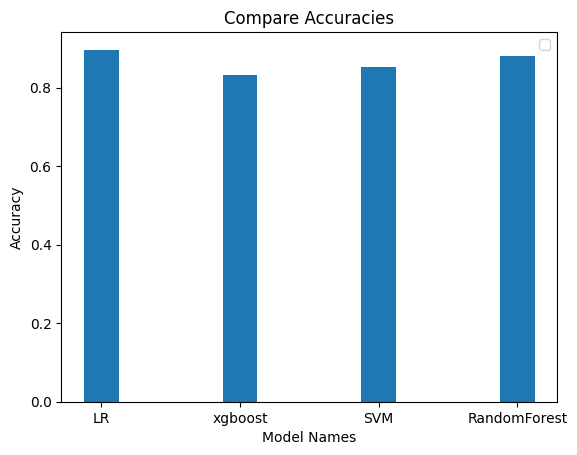

In [88]:
categories = ['LR', 'xgboost', 'SVM','RandomForest']
x = np.arange(len(categories))
accuracy = [accuracy_lr, accuracy_xgb, accuracy_svm, accuracy_rf]

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, accuracy, width=0.25)

plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Compare Accuracies')
plt.legend()
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()



---



---



# **Detecting Fake reviews**

In [80]:
from google.colab import files
uploaded=files.upload()

Saving inp.csv to inp (6).csv


In [81]:
inp_df = pd.read_csv("inp (6).csv")

In [82]:
inpu=inp_df['inp_text']

In [83]:
inpu

0    A memorable holiday experience.We all family m...
1    Hotel Allegro Chicago is a beautiful place. I ...
2    Hotel Adfdfdfd dgfdsffdfggdgfgl legro Chicago ...
3    I really like this hotel I would l;ike to give...
Name: inp_text, dtype: object

In [84]:
pred_inp=lr.predict(cv.transform(inpu))
pred_inp

array([1, 0, 0, 0])

In [85]:
pred_inprf = rf_model.predict(cv.transform(inpu))
pred_inprf

array([0, 0, 0, 1])

In [86]:
pred_inpsvm = svm_model.predict(cv.transform(inpu))
pred_inpsvm

array([1, 0, 0, 1])

In [87]:
pred_inpxgb = xgb_model.predict(cv.transform(inpu))
pred_inpxgb

array([0, 0, 0, 1])